In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import scipy.integrate #Integration library

Modeling bistability based on characteristic function from “Integrated Coherent Ising Machines Based on Self-Phase Modulation in Microring Resonators” (2020) Appendix A.

$\kappa I(n)=\left[ \kappa_{T}^2/4 + (\Delta + \chi n)^2\right]n $

$\kappa I(n)= \chi ^2 n^3 + 2 \Delta \chi n^2 + (\kappa_{T}^2/4+\Delta ^2)n $

$I(n)= an^3 + bn^2 + cn $


In [4]:
from intersect import intersection
import math
# trajectories of I(n) and dI(n)
def trajectory(k_T, k, x, delta):
    '''ODE system modeling a single optical nonlinear resonator
    Args:
        k_T: w0/Q, total linewidth of the resonator given its resonance angular frequency ω0 and loaded
quality factor Q
        k_W: waveguid linewidth
        k_L: loss linewidth
        k_T = k_W + k_L
        -----
        delta: delta = w0-w, the detuning of the resonance frequency from the drive field
        x: Chi, dispersive non-linear coefficient, strength of the optical Kerr effect, defined as the angular
frequency shift per photon inside the resonator.
        u: coherent drive/input amplitude, normalized to sqr(# Photons/time)
           input flux I = |u|^2
        z: complex mode amplitude of Kerr-nonlinear resonator, represents dynamics of a single resonant mode
           number of photons n := |z|^2
    return: z vs u / n vs I
    '''
    a = x**2 / k
    b = 2*delta*x /k
    c = (k_T**2 /4 + delta**2)/k
    d = 0
    lower_limit = 0
    upper_limit = 400
    num_pts = 200
    n = np.linspace(lower_limit, upper_limit, num_pts)
    I = np.polyval([a,b,c,d], n)
    dI = np.polyval([3*a,2*b,c], n)

    fig, ax1 = plt.subplots()

    ax1.set_xlabel('# Photons')
    ax1.set_ylabel('I(n)', color='b')
    ax1.plot(n, I, color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    
    ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
    
    ax2.set_ylabel('dI/dn', color='g')  # we already handled the x-label with ax1
    ax2.plot(n, dI, color='g')
    ax2.tick_params(axis='y', labelcolor='g')
    #plt.axhline(y = 0, color = 'r', linestyle = '--') 
    h = [0]*num_pts
    plt.plot(n,h, color = 'g', linestyle = '--')
    ax2.text(upper_limit-4,10, 'dI/dn = 0', 
         fontsize = 8, color = 'g')
    
    #fig.tight_layout()  # otherwise the right y-label is slightly clipped
    #plt.grid()
    #plt.axvline(color='black')
    #plt.axhline(color='black')

    # plot intersection
    x1, y1 = intersection(n, dI, n, h)
    if x1.any():
        print(x1,y1)
        ax2.scatter(x1,y1, color = 'tab:orange', marker ='x')
        x2,y2 =x1, np.polyval([a,b,c,d], x1)
        ax1.scatter(x2,y2, color = 'tab:orange', marker ='x')
        [plt.axvline(x = i, color = 'tab:orange', linestyle = '--') for i in x1]
        #ax1.annotate('extrema', xy = (x2[0], y2[0]), 
        #         fontsize = 8, xytext = (x2[0]+5, y2[0]+800), 
        #         arrowprops = dict(facecolor = 'tab:orange'),
        #         color = 'tab:orange')
        #ax1.annotate('',xy = (x2[1], y2[1]+5), 
        #         xytext = (x2[0]+9.5, y2[0]+800), 
        #         arrowprops = dict(facecolor = 'tab:orange'),
        #         color = 'tab:orange')
        plt.show()
    else:
        print ('There are no stable states.')
    
        

[ 6.74268968 19.97611586] [-0. -0.]


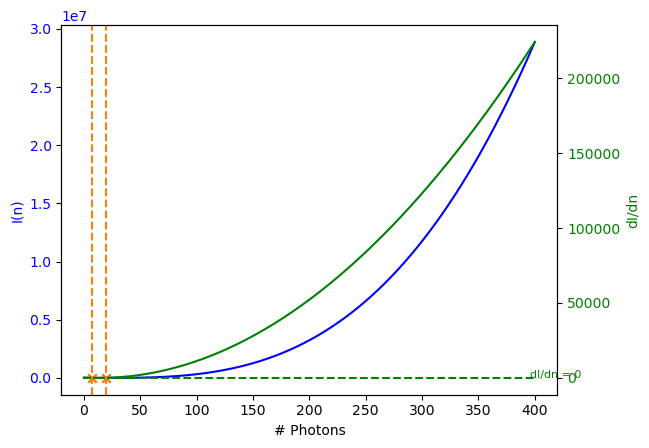

In [6]:
k_T = 1 
k = 2
delta = -20
x = 1
trajectory(k_T, k, x, delta)

[102.15934852 198.06294366] [-0. -0.]


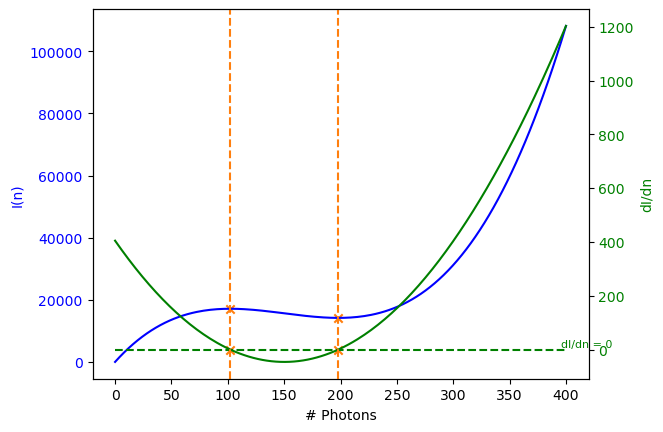

In [8]:
x = 1
k=150
k_l=50
K = k * abs(x)
K_t=(k+k_l)*abs(x)
#Delta=-225.17*x # 1.3K_T
Delta=-225.17
trajectory(K_t, K, x, Delta)

There are no stable states.


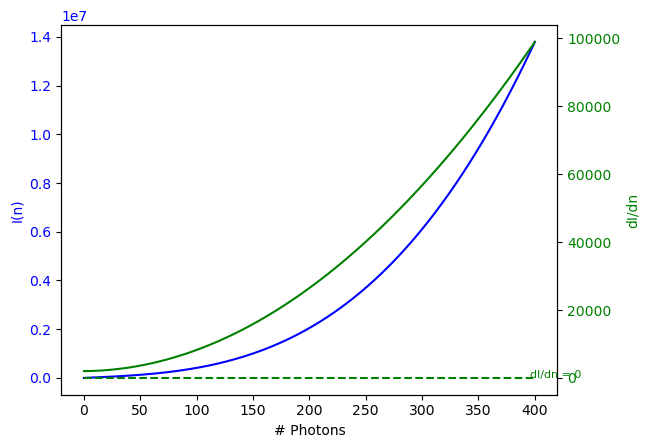

In [10]:
# below multi-stability thresh
k_T = 200 
k = 5
delta = 3
x = 1
trajectory(k_T, k, x, delta)

In [118]:
from intersect import intersection
import math
# trajectories of I(n) and dI(n)
def trajectory(k_T, k, x, delta):
    '''ODE system modeling a single optical nonlinear resonator
    Args:
        k_T: w0/Q, total linewidth of the resonator given its resonance angular frequency ω0 and loaded
quality factor Q
        k_W: waveguid linewidth
        k_L: loss linewidth
        k_T = k_W + k_L
        -----
        delta: delta = w0-w, the detuning of the resonance frequency from the drive field
        x: Chi, dispersive non-linear coefficient, strength of the optical Kerr effect, defined as the angular
frequency shift per photon inside the resonator.
        u: coherent drive/input amplitude, normalized to sqr(# Photons/time)
           input flux I = |u|^2
        z: complex mode amplitude of Kerr-nonlinear resonator, represents dynamics of a single resonant mode
           number of photons n := |z|^2
    return: z vs u / n vs I
    '''
    a = x**2 / k
    b = 2*delta*x /k
    c = (k_T**2 /4 + delta**2)/k
    d = 0
    lower_limit = 0
    upper_limit = 400
    num_pts = 200
    n = np.linspace(lower_limit, upper_limit, num_pts)
    I = np.polyval([a,b,c,d], n)
    dI = np.polyval([3*a,2*b,c], n)

    fig, ax1 = plt.subplots()

    ax1.set_xlabel('# Photons')
    ax1.set_ylabel('I(n)', color='b')
    ax1.plot(n, I, color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    
    ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
    
    ax2.set_ylabel('dI/dn', color='g')  # we already handled the x-label with ax1
    ax2.plot(n, dI, color='g')
    ax2.tick_params(axis='y', labelcolor='g')
    #plt.axhline(y = 0, color = 'r', linestyle = '--') 
    h = [0]*num_pts
    plt.plot(n,h, color = 'g', linestyle = '--')
    ax2.text(upper_limit-4,10, 'dI/dn = 0', 
         fontsize = 20, color = 'g')
    
    #fig.tight_layout()  # otherwise the right y-label is slightly clipped
    #plt.grid()
    #plt.axvline(color='black')
    #plt.axhline(color='black')

    # plot intersection
    x1, y1 = intersection(n, dI, n, h)
    if x1.any():
        #print(x1,y1)
        ax2.scatter(x1,y1, color = 'tab:orange', marker ='x')
        x2,y2 =x1, np.polyval([a,b,c,d], x1)
        ax1.scatter(x2,y2, color = 'tab:orange', marker ='x')
        [plt.axvline(x = i, color = 'tab:orange', linestyle = '--') for i in x1]
        ax1.annotate('extrema', xy = (x2[0], y2[0]), 
                 fontsize = 20, xytext = (x2[0]+50, y2[0]+9500), 
                 arrowprops = dict(facecolor = 'tab:orange'),
                 color = 'tab:orange')
        ax1.annotate('',xy = (x2[1], y2[1]+5), 
                 xytext = (x2[0]+50, y2[0]+8000), 
                 arrowprops = dict(facecolor = 'tab:orange'),
                 color = 'tab:orange')
        plt.show()
    else:
        print ('There are no stable states.')
    

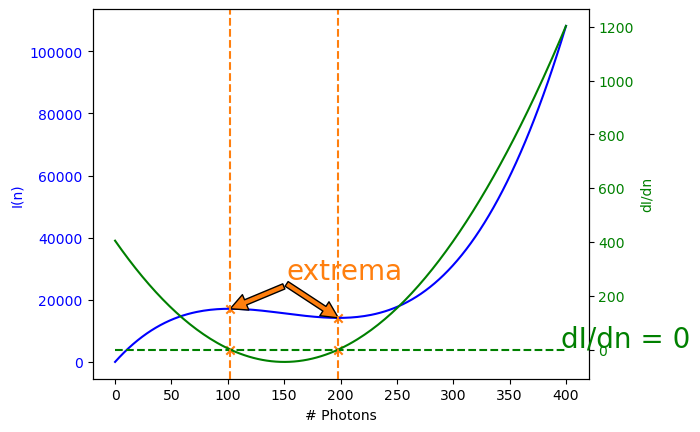

In [120]:
x = -1
k=150
k_l=50
K = k * abs(x)
K_t=(k+k_l)*abs(x)
#Delta=-225.17*x # 1.3K_T
Delta=225.17
trajectory(K_t, K, x, Delta)